In [3]:
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from sklearn.svm import SVC
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [4]:
path = "Dataset"

In [106]:
def preprocess_gray_images(path):
    counter = 0
    x = []
    labels = []
    for directory_path in glob.glob(os.path.join(path, "*\\")):
        for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (28, 28)).ravel()
            img = img.astype('float32')
            x.append(img)
            labels.append(counter)
        counter += 1
    x = np.asarray(x)
    x = x / 255.0
    Y = np.array(labels).astype('float32')
    return x, Y

In [84]:
def build_model(X_train):
  model=Sequential([Dense(units=128,activation='relu'),
                    Dense(units=100,activation='relu'),
                    Dense(units=55,activation='relu'),
                    Dense(units=150,activation='relu'),
                    Dense(units=190,activation='relu'),
                    Dense(units=190,activation='relu'),
                    Dense(units=200,activation='relu'),
                    Dense(units=190,activation='relu'),
                    Dense(units=190,activation='relu'),
                    Dense(units=10,activation='softmax')
                    ])
  model.build((None, X_train.shape[1]))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.Precision(),'accuracy'])
  return model

In [92]:
def Apply_ANN_first(path, k):
    x, Y = preprocess_gray_images(path)
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=42, shuffle=True)
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    model = build_model(X_train)
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    counter = 1
    for train, test in kfold.split(X_train, Y_train):
        print("At k = {}".format(counter))
        model.fit(X_train[train], Y_train[train], batch_size=64, epochs=50, validation_data=(X_train[test], Y_train[test]), validation_split=0.1)
        scores.append(model.evaluate(X_train[test], Y_train[test])[2])
        counter += 1
    eva = model.evaluate(X_test, Y_test)
    print("Test loss:", eva[0])
    print("Test accuracy:", eva[2])
    print("Test precision:", eva[1])

    return model, X_test, Y_test, scores

In [141]:
def predict_plot(X_test, Y_test, model, scores, k):
    y_pred = model.predict(X_test)
    X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))
    fig, axis = plt.subplots(4, 4, figsize = (12, 14))
    for i, ax in enumerate(axis.flat):
        ax.imshow(X_test_reshaped[i], cmap='binary')
        ax.set(title=f'Real Number is {Y_test[i].argmax()} \n Predict Number is {y_pred[i].argmax()}')
    plt.show()
    plt.plot([*range(1, k + 1)], scores, color='orange', marker='o')
    plt.xlabel("k num")
    plt.ylabel("test accuracy")
    plt.show()
    print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))

In [93]:
model, X_test, Y_test, scores = Apply_ANN_first(path, 10)

At k = 1
Epoch 1/50
24/24 [==============================] - 1s 22ms/step - loss: 2.3063 - precision_13: 0.0000e+00 - accuracy: 0.1038 - val_loss: 2.3039 - val_precision_13: 0.0000e+00 - val_accuracy: 0.1091
Epoch 2/50
24/24 [==============================] - 0s 9ms/step - loss: 2.3015 - precision_13: 0.0000e+00 - accuracy: 0.1078 - val_loss: 2.3022 - val_precision_13: 0.0000e+00 - val_accuracy: 0.1212
Epoch 3/50
24/24 [==============================] - 0s 9ms/step - loss: 2.3050 - precision_13: 0.0000e+00 - accuracy: 0.1038 - val_loss: 2.3034 - val_precision_13: 0.0000e+00 - val_accuracy: 0.0727
Epoch 4/50
24/24 [==============================] - 0s 9ms/step - loss: 2.2956 - precision_13: 0.0000e+00 - accuracy: 0.1112 - val_loss: 2.3161 - val_precision_13: 0.0000e+00 - val_accuracy: 0.1091
Epoch 5/50
24/24 [==============================] - 0s 10ms/step - loss: 2.3038 - precision_13: 0.0000e+00 - accuracy: 0.1024 - val_loss: 2.3030 - val_precision_13: 0.0000e+00 - val_accuracy: 0.0848

In [94]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 128)               100480    
                                                                 
 dense_131 (Dense)           (None, 100)               12900     
                                                                 
 dense_132 (Dense)           (None, 55)                5555      
                                                                 
 dense_133 (Dense)           (None, 150)               8400      
                                                                 
 dense_134 (Dense)           (None, 190)               28690     
                                                                 
 dense_135 (Dense)           (None, 190)               36290     
                                                                 
 dense_136 (Dense)           (None, 200)             

13/13 [==============================] - 0s 3ms/step


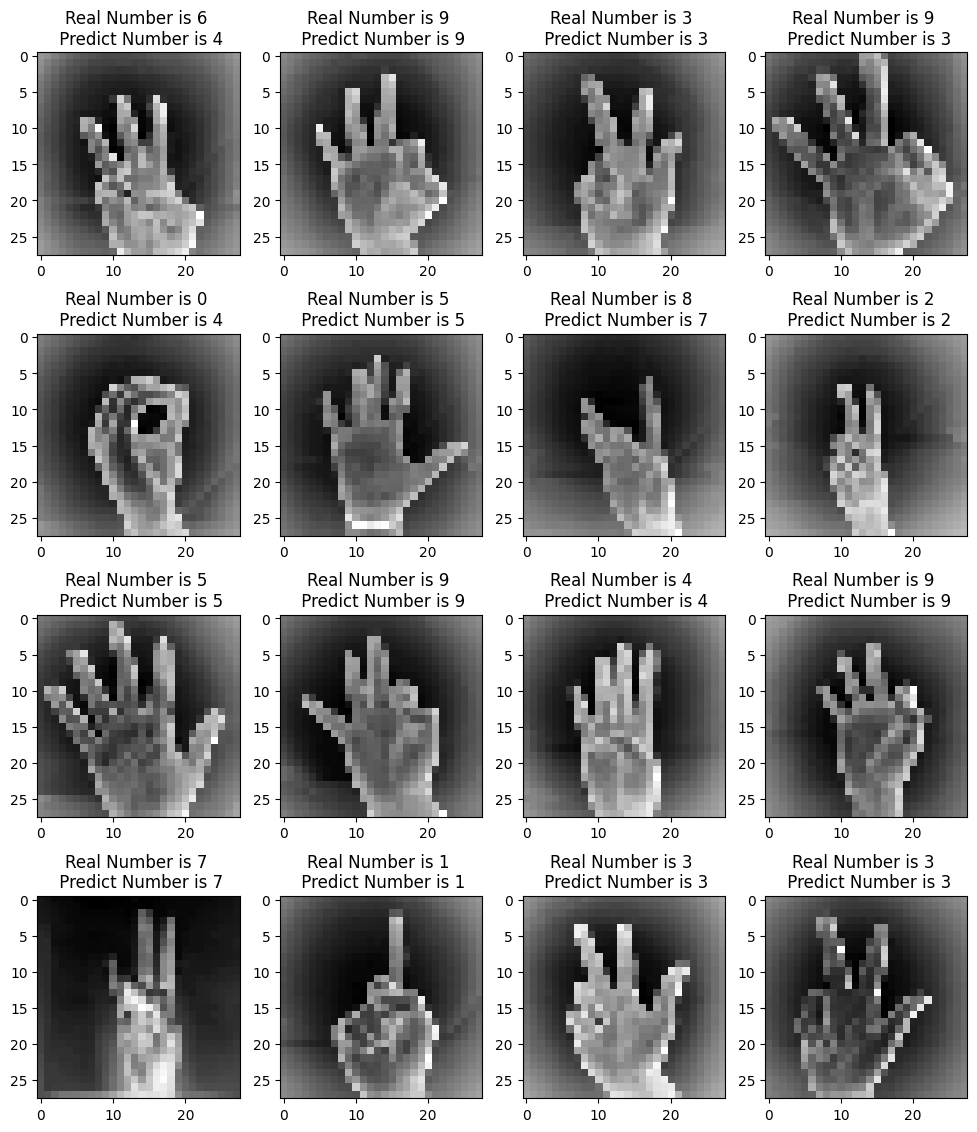

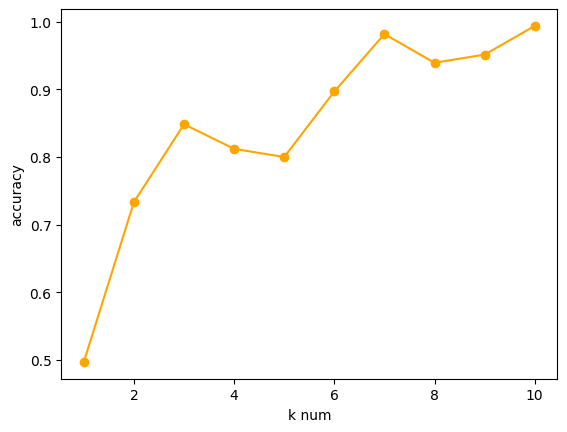

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.90      0.92      0.91        48
           2       0.80      0.70      0.74        50
           3       0.82      0.77      0.79        35
           4       0.50      0.69      0.58        32
           5       0.83      0.89      0.86        38
           6       0.81      0.71      0.75        41
           7       0.55      0.74      0.63        38
           8       0.94      0.67      0.78        45
           9       0.76      0.76      0.76        46

    accuracy                           0.76       413
   macro avg       0.77      0.76      0.76       413
weighted avg       0.78      0.76      0.77       413



In [95]:
predict_plot(X_test, Y_test, model, scores, 10)

In [96]:
def build_model2(X_train):
  model=Sequential([Dense(units=1024,activation='sigmoid'),
                    Dense(units=512,activation='sigmoid'),
                    Dense(units=512,activation='sigmoid'),
                    Dense(units=256,activation='sigmoid'),
                    Dense(units=256,activation='sigmoid'),
                    Dense(units=10,activation='softmax')
                    ])
  model.build((None, X_train.shape[1]))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.Precision(),'accuracy'])
  return model

In [98]:
def Apply_ANN_second(path, k):
    x, Y = preprocess_gray_images(path)
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=42, shuffle=True)
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    model = build_model2(X_train)
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    counter = 1
    for train, test in kfold.split(X_train, Y_train):
        print("At k = {}".format(counter))
        model.fit(X_train[train], Y_train[train], batch_size=64, epochs=50, validation_data=(X_train[test], Y_train[test]), validation_split=0.1)
        scores.append(model.evaluate(X_train[test], Y_train[test])[2])
        counter += 1
    eva = model.evaluate(X_test, Y_test)
    print("Test loss:", eva[0])
    print("Test accuracy:", eva[2])
    print("Test precision:", eva[1])

    return model, X_test, Y_test, scores

In [99]:
model2, X_test2, Y_test2, scores2 = Apply_ANN_second(path, 10)

At k = 1
Epoch 1/50
24/24 [==============================] - 1s 24ms/step - loss: 2.3742 - precision_14: 0.0000e+00 - accuracy: 0.1071 - val_loss: 2.3588 - val_precision_14: 0.0000e+00 - val_accuracy: 0.1212
Epoch 2/50
24/24 [==============================] - 0s 11ms/step - loss: 2.3320 - precision_14: 0.0000e+00 - accuracy: 0.1011 - val_loss: 2.3247 - val_precision_14: 0.0000e+00 - val_accuracy: 0.1212
Epoch 3/50
24/24 [==============================] - 0s 11ms/step - loss: 2.3220 - precision_14: 0.0000e+00 - accuracy: 0.0997 - val_loss: 2.3121 - val_precision_14: 0.0000e+00 - val_accuracy: 0.0606
Epoch 4/50
24/24 [==============================] - 0s 10ms/step - loss: 2.3205 - precision_14: 0.0000e+00 - accuracy: 0.0950 - val_loss: 2.3144 - val_precision_14: 0.0000e+00 - val_accuracy: 0.1212
Epoch 5/50
24/24 [==============================] - 0s 10ms/step - loss: 2.3253 - precision_14: 0.0000e+00 - accuracy: 0.0889 - val_loss: 2.3258 - val_precision_14: 0.0000e+00 - val_accuracy: 0.1

In [100]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 1024)              803840    
                                                                 
 dense_141 (Dense)           (None, 512)               524800    
                                                                 
 dense_142 (Dense)           (None, 512)               262656    
                                                                 
 dense_143 (Dense)           (None, 256)               131328    
                                                                 
 dense_144 (Dense)           (None, 256)               65792     
                                                                 
 dense_145 (Dense)           (None, 10)                2570      
                                                                 
Total params: 1,790,986
Trainable params: 1,790,986
N

13/13 [==============================] - 0s 3ms/step


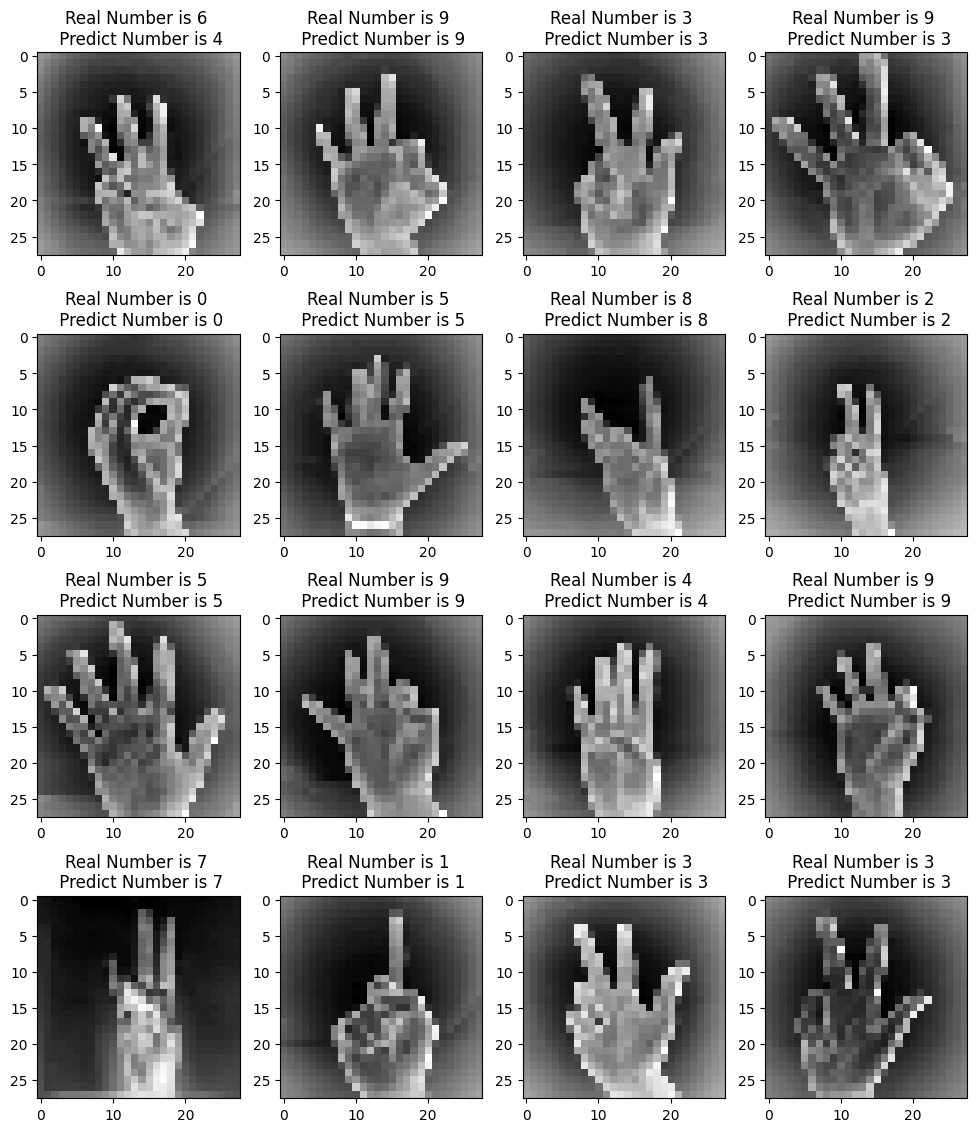

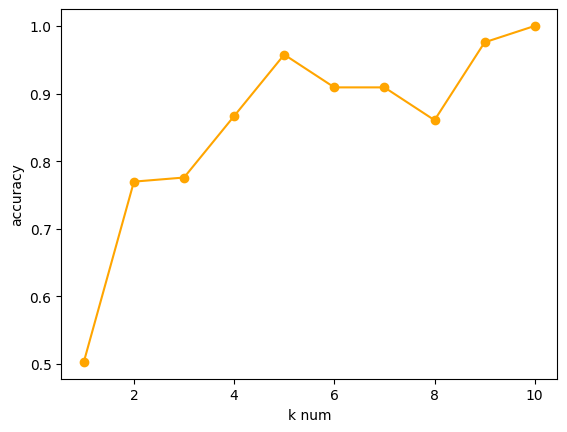

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.84      0.85      0.85        48
           2       0.86      0.72      0.78        50
           3       0.82      0.80      0.81        35
           4       0.54      0.69      0.60        32
           5       0.88      0.92      0.90        38
           6       0.76      0.78      0.77        41
           7       0.67      0.76      0.72        38
           8       0.89      0.71      0.79        45
           9       0.78      0.83      0.80        46

    accuracy                           0.79       413
   macro avg       0.79      0.79      0.79       413
weighted avg       0.80      0.79      0.79       413



In [101]:
predict_plot(X_test2, Y_test2, model2, scores2, 10)

In [5]:
def preprocess_RGB_images(path):
    counter = 0
    x = []
    labels = []
    for directory_path in glob.glob(os.path.join(path, "*\\")):
        for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (64, 64))
            x.append(img)
            labels.append(counter)
        counter += 1
    x = np.asarray(x).astype('float32')

    for i in range(len(x)):
        for j in range(len(x[i])):
            for k in range(len(x[i][j])):
                x[i, j, k] = (x[i, j, k] - x[i, j, k].mean()) / 255.0

    Y = np.array(labels).astype('float32')
    return x, Y

In [6]:
x, Y = preprocess_RGB_images(path)

In [7]:
def cnn_layers():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64,64, 3), padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units = 10, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.Precision(), 'accuracy'])
    return model

In [8]:
def Apply_CNN(path, k, x, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=42, shuffle=True)
    Y_train_cat = to_categorical(Y_train)
    Y_test_cat = to_categorical(Y_test)
    model = cnn_layers()
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    counter = 1
    for train, test in kfold.split(X_train, Y_train):
        print("At k = {}".format(counter))
        model.fit(X_train[train], Y_train_cat[train], batch_size=64, epochs=15, validation_data=(X_train[test], Y_train_cat[test]), validation_split=0.1)
        scores.append(model.evaluate(X_train[test], Y_train_cat[test])[2])
        counter += 1
    eva = model.evaluate(X_test, Y_test_cat)
    print("Test loss:", eva[0])
    print("Test accuracy:", eva[2])
    print("Test precision:", eva[1])

    return model, X_train, X_test, Y_train, Y_test, scores, Y_test_cat, eva 

In [140]:
def svm(x_train, x_test, y_train, y_test):
    x_1, x_2, x_3, x_4 = x_train.shape
    x_re_train = x_train.reshape((x_1, x_2 * x_3 * x_4))
    x_1, x_2, x_3, x_4 = x_test.shape
    x_re_test = x_test.reshape((x_1, x_2 * x_3 * x_4))
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(x_re_train, y_train)
    y_pred = svm.predict(x_re_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [9]:
def predict_plot_cnn(X_test, Y_test, model, scores, k):
    y_pred = model.predict(X_test)
    fig, axis = plt.subplots(4, 4, figsize = (12, 14))
    for i, ax in enumerate(axis.flat):
        ax.imshow(X_test[i])
        ax.set(title=f'Real Number is {Y_test[i].argmax()} \n Predict Number is {y_pred[i].argmax()}')
    plt.show()
    plt.plot([*range(1, k + 1)], scores, color='orange', marker='o')
    plt.xlabel("k num")
    plt.ylabel("test accuracy")
    plt.show()
    print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))

In [10]:
cnn, x_train, x_test, y_train, y_test, scores_cnn, y_test_cat, eva_cnn = Apply_CNN(path, 5, x, Y)

At k = 1
Epoch 1/15
19/19 [==============================] - 5s 75ms/step - loss: 2.2985 - precision: 0.0000e+00 - accuracy: 0.1112 - val_loss: 2.2947 - val_precision: 0.0000e+00 - val_accuracy: 0.1136
Epoch 2/15
19/19 [==============================] - 1s 29ms/step - loss: 2.2329 - precision: 0.0000e+00 - accuracy: 0.1542 - val_loss: 2.0653 - val_precision: 0.0000e+00 - val_accuracy: 0.2348
Epoch 3/15
19/19 [==============================] - 1s 28ms/step - loss: 1.9252 - precision: 0.5818 - accuracy: 0.3050 - val_loss: 1.6727 - val_precision: 0.8095 - val_accuracy: 0.3939
Epoch 4/15
19/19 [==============================] - 1s 30ms/step - loss: 1.4012 - precision: 0.7169 - accuracy: 0.4836 - val_loss: 1.1521 - val_precision: 0.7647 - val_accuracy: 0.6515
Epoch 5/15
19/19 [==============================] - 1s 31ms/step - loss: 0.9346 - precision: 0.8095 - accuracy: 0.6976 - val_loss: 0.7289 - val_precision: 0.8476 - val_accuracy: 0.8182
Epoch 6/15
19/19 [==============================] 

KeyboardInterrupt: 

In [128]:
cnn.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)     

13/13 [==============================] - 0s 9ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

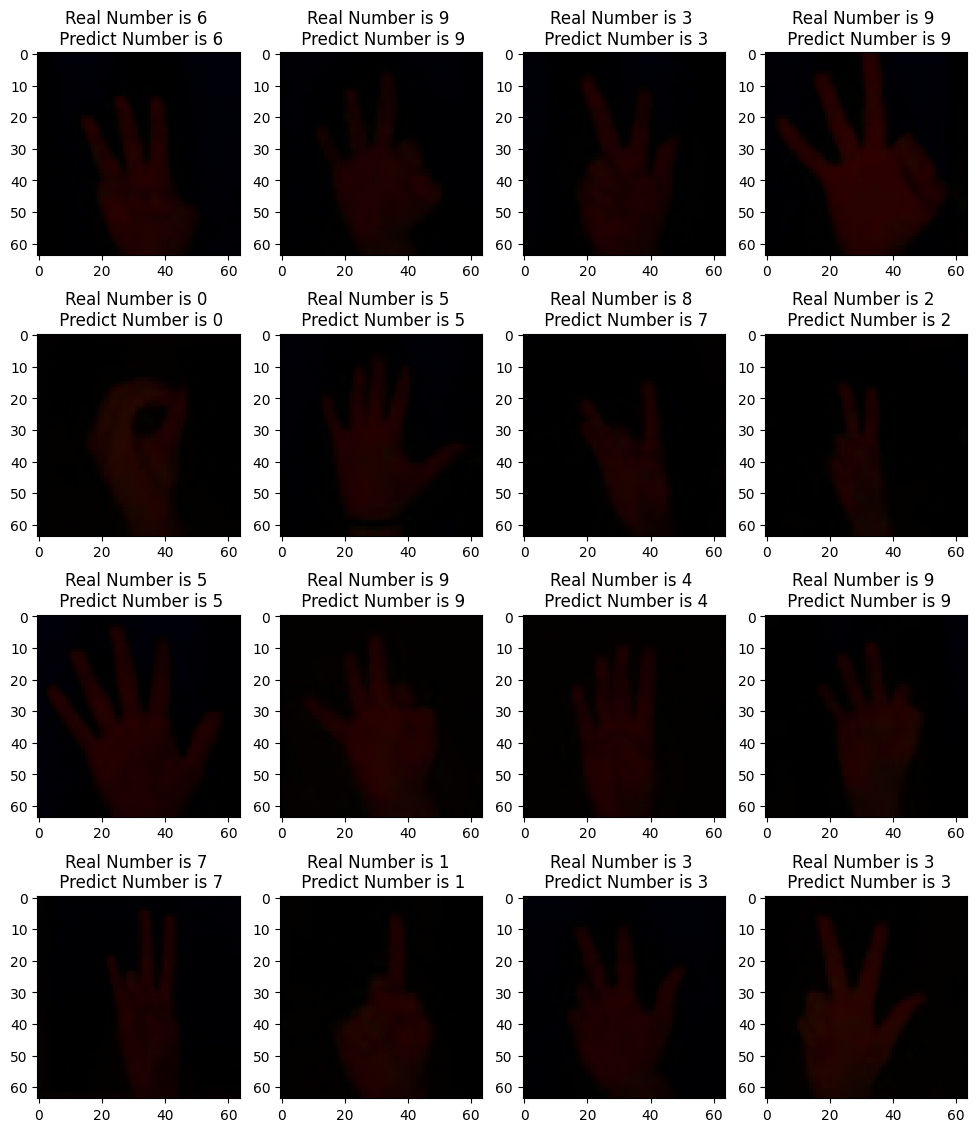

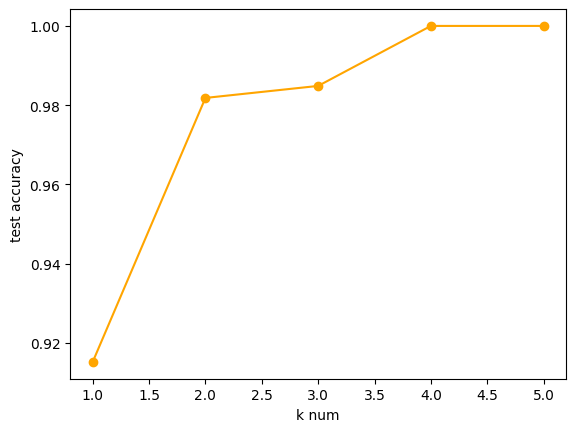

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      1.00      0.96        48
           2       0.96      0.92      0.94        50
           3       0.95      1.00      0.97        35
           4       1.00      1.00      1.00        32
           5       1.00      0.97      0.99        38
           6       1.00      0.93      0.96        41
           7       0.90      0.97      0.94        38
           8       0.93      0.87      0.90        45
           9       0.98      0.98      0.98        46

    accuracy                           0.96       413
   macro avg       0.96      0.96      0.96       413
weighted avg       0.96      0.96      0.96       413



In [134]:
predict_plot_cnn(x_test, y_test_cat, cnn, scores_cnn, 5)

In [137]:
acc_svm = svm(x_train, x_test, y_train, y_test)

In [139]:
print("CNN Accuracy = {}".format(eva_cnn[2]))
print("SVM Accuracy = {}".format(acc_svm))

CNN Accuracy = 0.9612590670585632
SVM Accuracy = 0.7990314769975787
